In [1]:
import pickle
import numpy as np
import scipy.stats as stats
import math
import json

In [2]:
model = "Qwen3-14B"

In [3]:
with open("/data/home/vkropoti/sql_data/mini-dev-index", "rb") as fp:   # Unpickling
    mini_dev_index = np.array(pickle.load(fp))
    
def load_json():
    with open('/home/vkropoti/vllm/dev.json', "r") as j:
        contents = json.loads(j.read())
    return contents

def load_split():
    data = load_json()
    query_level = []
    for k in mini_dev_index:
        query_level.append(data[k]['difficulty'])
    return np.array(query_level)

In [10]:
split = load_split()

In [11]:
np.mean(split=='simple')

np.float64(0.296)

In [12]:
np.mean(split=='moderate')

np.float64(0.5)

In [13]:
np.mean(split=='challenging')

np.float64(0.204)

In [14]:
def I_alpha(mean,n,std_dev,confidence = 0.95):
    # Критическое значение t для 95% ДИ и 49 степеней свободы
    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_value * (std_dev / math.sqrt(n))
    
    # Границы доверительного интервала
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    return ci_lower, ci_upper

In [15]:
def load_results(k,nobs,cot_type,think=False):
    # sql_results_Qwen3-8B-cot_all_new_think==False_nobs2-v0
    # with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_results_{model}-cot_{type_cot}_think=={use_think}-v{k}", "rb") as fp:
    with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_results_Qwen3-14B-cot_{cot_type}_think=={think}_nobs{nobs}-v{k}", "rb") as fp:
        results = np.array(pickle.load(fp))
    return results

In [16]:
def load_executed(k,nobs,cot_type,think=False):
    # /data/home/vkropoti/sql_llm_answers/base_reasoning/sql_executed_{model}-cot_{type_cot}_think=={use_think}-v{version}
    with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_executed_Qwen3-14B-cot_{cot_type}_think=={think}_nobs{nobs}-v{k}", "rb") as fp:
        executed = np.array(pickle.load(fp))
    return executed

In [17]:
def get_think_results(n,nobs=2,cot_type='all_new',think=False):
    
    arr_mean_scores = []
    arr_mean_executed = []
    d_split = {"simple":[], "moderate":[], "challenging":[]}
    for i in range(n):
        result, executed = load_results(i,nobs,cot_type,think), load_executed(i,nobs,cot_type,think)
        arr_mean_scores.append(np.mean(result))
        arr_mean_executed.append(np.mean(executed))
        d_split['simple'].append(np.mean(result[split=='simple']))
        d_split['moderate'].append(np.mean(result[split=='moderate']))
        d_split['challenging'].append(np.mean(result[split=='challenging']))
        
    if cot_type=='all_new':
        add = "данные о размышлениях + финальный ответ"
    elif cot_type=='think':
        add = "только данные о размышлениях"
    elif cot_type=='predict':
        add = "только данные о финальных ответах"

    ci_lower, ci_upper = I_alpha(np.mean(np.array(arr_mean_scores)),n,np.std(np.array(arr_mean_scores)))
    print(f"Модель основывает ответ по {nobs} выводам других моделей, которые включают {add}")
    print(f"Результаты получены прогоном {n} симуляций с разными seed")
    print(f"{model} Mini DEV Финальный результат EX: {np.mean(np.array(arr_mean_scores)):.5f}, при std: {np.std(np.array(arr_mean_scores)):.4f}")
    print(f"95% доверительный интервал: ({ci_lower:.5f},{ci_upper:.5f})")
    for type_ in d_split:
        print(f"{type_}: {np.mean(np.array(d_split[type_])):.5f}")
    # print(f"{model} процент запросов, которые успешно выполнились Mini DEV: {np.mean(np.array(arr_mean_executed)):.4f}, при std: {np.std(np.array(arr_mean_executed)):.4f}")
    

## Использование reasoning+ответ

In [20]:
get_think_results(20,nobs=2,cot_type='all_new')

Модель основывает ответ по 2 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54210, при std: 0.0129
95% доверительный интервал: (0.53607,0.54813)
simple: 0.67635
moderate: 0.52380
challenging: 0.39216


In [22]:
get_think_results(20,nobs=3,cot_type='all_new')

Модель основывает ответ по 3 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54480, при std: 0.0093
95% доверительный интервал: (0.54043,0.54917)
simple: 0.67872
moderate: 0.52620
challenging: 0.39608


In [24]:
get_think_results(20,nobs=4,cot_type='all_new')

Модель основывает ответ по 4 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54700, при std: 0.0091
95% доверительный интервал: (0.54274,0.55126)
simple: 0.67703
moderate: 0.53080
challenging: 0.39804


In [27]:
get_think_results(20,nobs=5,cot_type='all_new')

Модель основывает ответ по 5 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54990, при std: 0.0081
95% доверительный интервал: (0.54612,0.55368)
simple: 0.67973
moderate: 0.53380
challenging: 0.40098


In [29]:
get_think_results(20,nobs=6,cot_type='all_new')

Модель основывает ответ по 6 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54920, при std: 0.0087
95% доверительный интервал: (0.54513,0.55327)
simple: 0.67804
moderate: 0.53420
challenging: 0.39902


In [30]:
get_think_results(20,nobs=7,cot_type='all_new')

Модель основывает ответ по 7 выводам других моделей, которые включают данные о размышлениях + финальный ответ
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54890, при std: 0.0087
95% доверительный интервал: (0.54484,0.55296)
simple: 0.67736
moderate: 0.53500
challenging: 0.39657


## Использование только ответ

In [23]:
get_think_results(20,nobs=2,cot_type='predict')

Модель основывает ответ по 2 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.53720, при std: 0.0114
95% доверительный интервал: (0.53189,0.54251)
simple: 0.67162
moderate: 0.51740
challenging: 0.39069


In [25]:
get_think_results(20,nobs=3,cot_type='predict')

Модель основывает ответ по 3 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54150, при std: 0.0124
95% доверительный интервал: (0.53572,0.54728)
simple: 0.67162
moderate: 0.52320
challenging: 0.39755


In [26]:
get_think_results(20,nobs=4,cot_type='predict')

Модель основывает ответ по 4 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54310, при std: 0.0126
95% доверительный интервал: (0.53719,0.54901)
simple: 0.67027
moderate: 0.52760
challenging: 0.39657


In [28]:
get_think_results(20,nobs=5,cot_type='predict')

Модель основывает ответ по 5 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54510, при std: 0.0098
95% доверительный интервал: (0.54053,0.54967)
simple: 0.67061
moderate: 0.52880
challenging: 0.40294


In [32]:
get_think_results(20,nobs=6,cot_type='predict')

Модель основывает ответ по 6 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54440, при std: 0.0107
95% доверительный интервал: (0.53941,0.54939)
simple: 0.66791
moderate: 0.52960
challenging: 0.40147


In [34]:
get_think_results(20,nobs=7,cot_type='predict')

Модель основывает ответ по 7 выводам других моделей, которые включают только данные о финальных ответах
Результаты получены прогоном 20 симуляций с разными seed
Qwen3-14B Mini DEV Финальный результат EX: 0.54460, при std: 0.0104
95% доверительный интервал: (0.53974,0.54946)
simple: 0.67230
moderate: 0.52780
challenging: 0.40049


## Использование только размышлений

In [35]:
# get_think_results(50,nobs=2,cot_type='think')

In [36]:
# get_think_results(50,nobs=3,cot_type='think')

In [37]:
# get_think_results(50,nobs=4,cot_type='think')

In [38]:
# get_think_results(50,nobs=5,cot_type='think')

## Использование reasoning+ответ + reasning above

In [39]:
# get_think_results(50,nobs=2,cot_type='all_new',think=True)

In [40]:
# get_think_results(50,nobs=3,cot_type='all_new',think=True)

## Использование ответ + reasning above

In [41]:
# get_think_results(50,nobs=2,cot_type='predict',think=True)

In [42]:
# get_think_results(50,nobs=3,cot_type='predict',think=True)

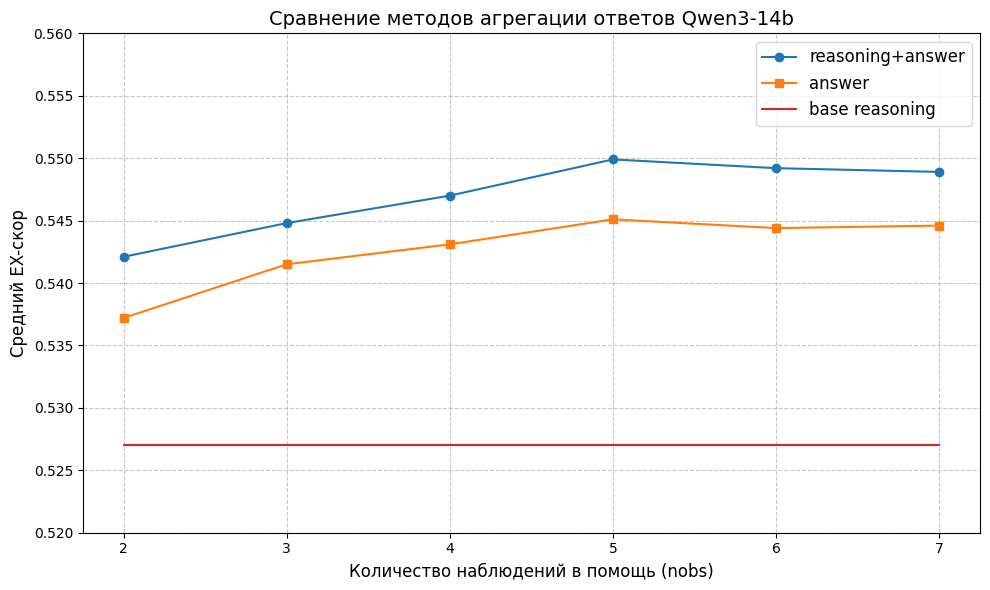

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
nobs = [2, 3, 4, 5, 6, 7]
scores = [0.54210, 0.54480, 0.54700, 0.54990, 0.54920, 0.54890]          # reasoning+answer
scores_predict = [0.53720, 0.54150, 0.54310, 0.54510, 0.54440, 0.54460]  # answer
scores_think = [0.53544, 0.53816, 0.53884, 0.53912]   # reasoning
base_think = [0.527]*6
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(nobs, scores, marker='o', label='reasoning+answer', color='tab:blue')
plt.plot(nobs, scores_predict, marker='s', label='answer', color='tab:orange')
# plt.plot(nobs[0:4], scores_think, marker='^', label='reasoning', color='tab:green')
plt.plot(nobs, base_think, label='base reasoning', color='tab:red')

# Настройки
plt.title('Сравнение методов агрегации ответов Qwen3-14b', fontsize=14)
plt.xlabel('Количество наблюдений в помощь (nobs)', fontsize=12)
plt.ylabel('Средний EX-скор', fontsize=12)
plt.xticks(nobs)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ylim(0.52, 0.56)  # Фиксируем диапазон для лучшего сравнения

# Отображение
plt.tight_layout()
plt.show()